## Interactive Liquidity Stress Simulation – Explanation

In this section, I created an interactive and gamified liquidity risk simulation using sliders. These sliders allow me to change the severity of different market stress scenarios and instantly observe how the bank’s financial condition changes.

The **Bank Run slider** represents the percentage of depositors who suddenly withdraw their money. As this value increases, the bank’s cash reduces quickly, showing how panic can drain liquidity.

The **Margin Call slider** simulates a situation where asset prices fall and the bank is forced to pay additional cash as collateral. Higher values increase cash outflows and add more stress to the system.

The **Asset Fire Sale slider** represents the loss incurred when the bank is forced to sell assets quickly at discounted prices during a crisis. This directly reduces the value of the bank’s assets.

The **Funding Crisis slider** simulates the sudden loss of short-term funding. As this value increases, the bank loses access to borrowed money, causing further reduction in available cash.

After adjusting the sliders, the dashboard updates in real time and displays key results such as final cash position, liquidity ratios, and asset values. The bar chart provides a visual summary of the stress test results, helping to clearly identify whether the bank survives or faces high liquidity risk under different scenarios.

This interactive setup helps in understanding how multiple stress events together can severely impact a bank’s liquidity and highlights the importance of effective liquidity risk management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Basic assumptions
deposit_per_customer = 100000  # assumed average deposit

total_customers = len(df)
total_deposits = total_customers * deposit_per_customer

# Balance sheet assumptions
cash = total_deposits * 0.30          # 30% cash
assets = total_deposits * 1.20        # loans + investments
short_term_funding = total_deposits * 0.40

bank = {
    "Total Deposits": total_deposits,
    "Cash": cash,
    "Total Assets": assets,
    "Short Term Funding": short_term_funding
}

bank

{'Total Deposits': 4118800000,
 'Cash': 1235640000.0,
 'Total Assets': 4942560000.0,
 'Short Term Funding': 1647520000.0}

In [4]:
def liquidity_ratios(cash, deposits, funding):
    cash_ratio = cash / deposits
    lcr = cash / funding
    return cash_ratio, lcr

In [5]:
def liquidity_stress_simulation(
    bank_run_rate=0.3,
    margin_call_rate=0.1,
    fire_sale_loss=0.25,
    funding_loss_rate=0.4
):
    cash = bank["Cash"]
    assets = bank["Total Assets"]
    deposits = bank["Total Deposits"]
    funding = bank["Short Term Funding"]

    # Bank Run
    withdrawals = bank_run_rate * deposits
    cash -= withdrawals

    # Margin Call
    margin_call = margin_call_rate * assets
    cash -= margin_call

    # Asset Fire Sale
    assets_after_fire_sale = assets * (1 - fire_sale_loss)

    # Funding Crisis
    funding_loss = funding_loss_rate * funding
    cash -= funding_loss

    # Liquidity Ratios
    cash_ratio, lcr = liquidity_ratios(cash, deposits, funding)

    # Results
    results = {
        "Final Cash": cash,
        "Assets After Fire Sale": assets_after_fire_sale,
        "Cash Ratio": cash_ratio,
        "Liquidity Coverage Ratio": lcr
    }

    return results

In [7]:
from ipywidgets import interact, FloatSlider

@interact(
    bank_run_rate=FloatSlider(
        min=0.0, max=0.6, step=0.05, value=0.3,
        description="Bank Run %"
    ),
    margin_call_rate=FloatSlider(
        min=0.0, max=0.3, step=0.05, value=0.1,
        description="Margin Call %"
    ),
    fire_sale_loss=FloatSlider(
        min=0.0, max=0.5, step=0.05, value=0.25,
        description="Fire Sale Loss %"
    ),
    funding_loss_rate=FloatSlider(
        min=0.0, max=0.6, step=0.05, value=0.4,
        description="Funding Loss %"
    )
)
def run_simulation(bank_run_rate, margin_call_rate, fire_sale_loss, funding_loss_rate):
    
    results = liquidity_stress_simulation(
        bank_run_rate,
        margin_call_rate,
        fire_sale_loss,
        funding_loss_rate
    )

    # Print results clearly
    for k, v in results.items():
        print(f"{k}: {v:,.2f}")

    # Dashboard plot
    plt.figure(figsize=(8,4))
    plt.bar(results.keys(), results.values())
    plt.title("Liquidity Stress Test Results")
    plt.xticks(rotation=45)
    plt.ylabel("Value")
    plt.show()

interactive(children=(FloatSlider(value=0.3, description='Bank Run %', max=0.6, step=0.05), FloatSlider(value=…

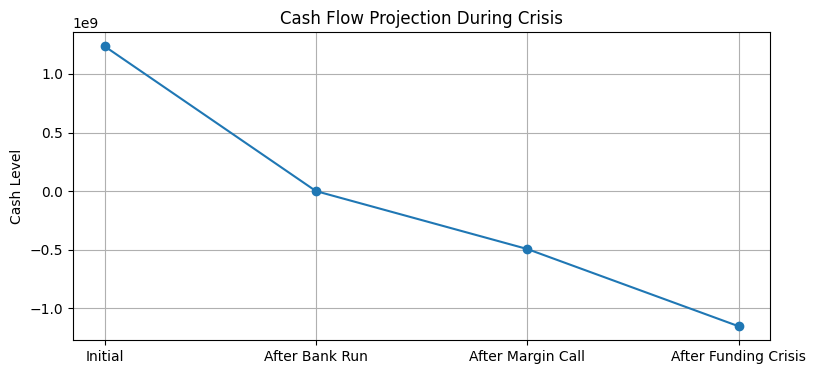

In [8]:
def cash_flow_projection():
    stages = [
        "Initial",
        "After Bank Run",
        "After Margin Call",
        "After Funding Crisis"
    ]

    cash_values = [
        bank["Cash"],
        bank["Cash"] - 0.3 * bank["Total Deposits"],
        bank["Cash"] - 0.3 * bank["Total Deposits"] - 0.1 * bank["Total Assets"],
        bank["Cash"] - 0.3 * bank["Total Deposits"] - 0.1 * bank["Total Assets"] - 0.4 * bank["Short Term Funding"]
    ]

    plt.figure(figsize=(9,4))
    plt.plot(stages, cash_values, marker='o')
    plt.title("Cash Flow Projection During Crisis")
    plt.ylabel("Cash Level")
    plt.grid()
    plt.show()

cash_flow_projection()

In [14]:
def stress_test_verdict(cash):
    if cash <= 0:
        return "❌ Bank Fails"
    elif cash / bank["Total Deposits"] < 0.1:
        return "⚠️ High Liquidity Risk"
    else:
        return "✅ Bank Survives"

final_cash = liquidity_stress_simulation()["Final Cash"]
stress_test_verdict(final_cash)

'❌ Bank Fails'

## Stress Test Verdict – Interpretation

The stress test result shows **“❌ Bank Fails”**, which means that under the selected stress conditions, the bank does not have enough cash to survive the crisis.

This outcome occurs because the combined impact of a bank run, margin calls, asset fire sales, and a funding crisis causes the bank’s cash balance to fall to zero or become negative. When this happens, the bank is unable to meet its short-term obligations and withdrawals.

In real-world terms, this represents a severe liquidity crisis where the bank cannot continue operations without external support, such as emergency funding or government intervention. This result highlights how multiple stress events occurring together can quickly lead to bank failure and emphasizes the importance of strong liquidity risk management.